In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import numpy as np
import os

# Load the effective areas

In [28]:
path = 'resources/'
results = np.load(os.path.join(path, 'effective_areas_av_per_day_fine_binning.npy'))

# 2d plot of effective areas of icecube and plenum (icecube+km3net+p-one+GVD)

<IPython.core.display.Javascript object>


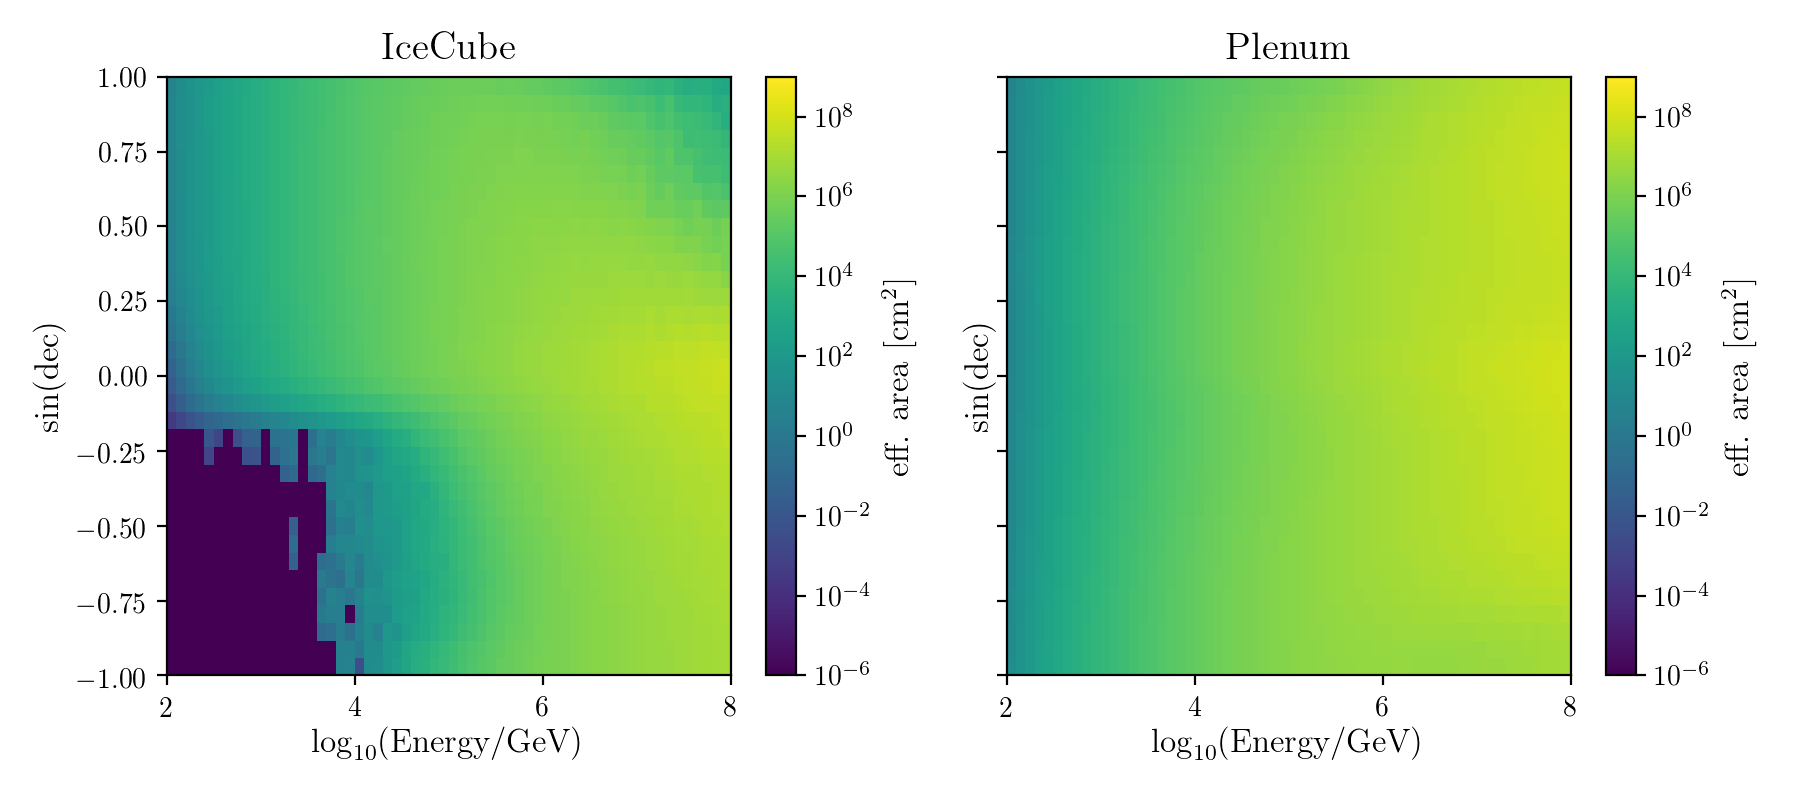

In [29]:
e_bins = np.arange(2,8.1,0.1)#np.linspace(2.,9.,num=25)
sd_bins = np.linspace(-1.,1.,35)
n_sd, n_e = len(sd_bins)-1, len(e_bins)-1



fig, axes=plt.subplots(ncols=2, figsize=(9,4), sharey=True)

ax = axes[0]
ax.set_title('IceCube', fontsize=14)
p = ax.pcolormesh(e_bins, sd_bins, #Res_effA*1e4
                  results['effA_icecube'].reshape((n_sd, n_e)) 
                  , norm=LogNorm(),#, vmin=1e-2)#, 
                  vmax = 1e9, vmin=1e-6)

ax.set_xlabel(r'$\log_{10}$(Energy/GeV)',fontsize=12)
ax.set_ylabel(r'sin(dec)',fontsize=12)

cb=fig.colorbar(p,ax=ax)
cb.set_label(r'eff. area [cm$^2$]', fontsize=12)

ax = axes[1]
ax.set_title('Plenum', fontsize=14)
p = ax.pcolormesh(e_bins, sd_bins,
                  results['effA_plenum'].reshape((n_sd, n_e))  
                  , norm=LogNorm(),#, vmin=1e-2)#, 
                  vmax = 1e9, vmin=1e-6)

ax.set_xlabel(r'$\log_{10}$(Energy/GeV)',fontsize=12)
ax.set_ylabel(r'sin(dec)',fontsize=12)

cb=fig.colorbar(p,ax=ax)
cb.set_label(r'eff. area [cm$^2$]', fontsize=12)

fig.tight_layout()
plt.show()

# 1d slices for different declination bands

<IPython.core.display.Javascript object>


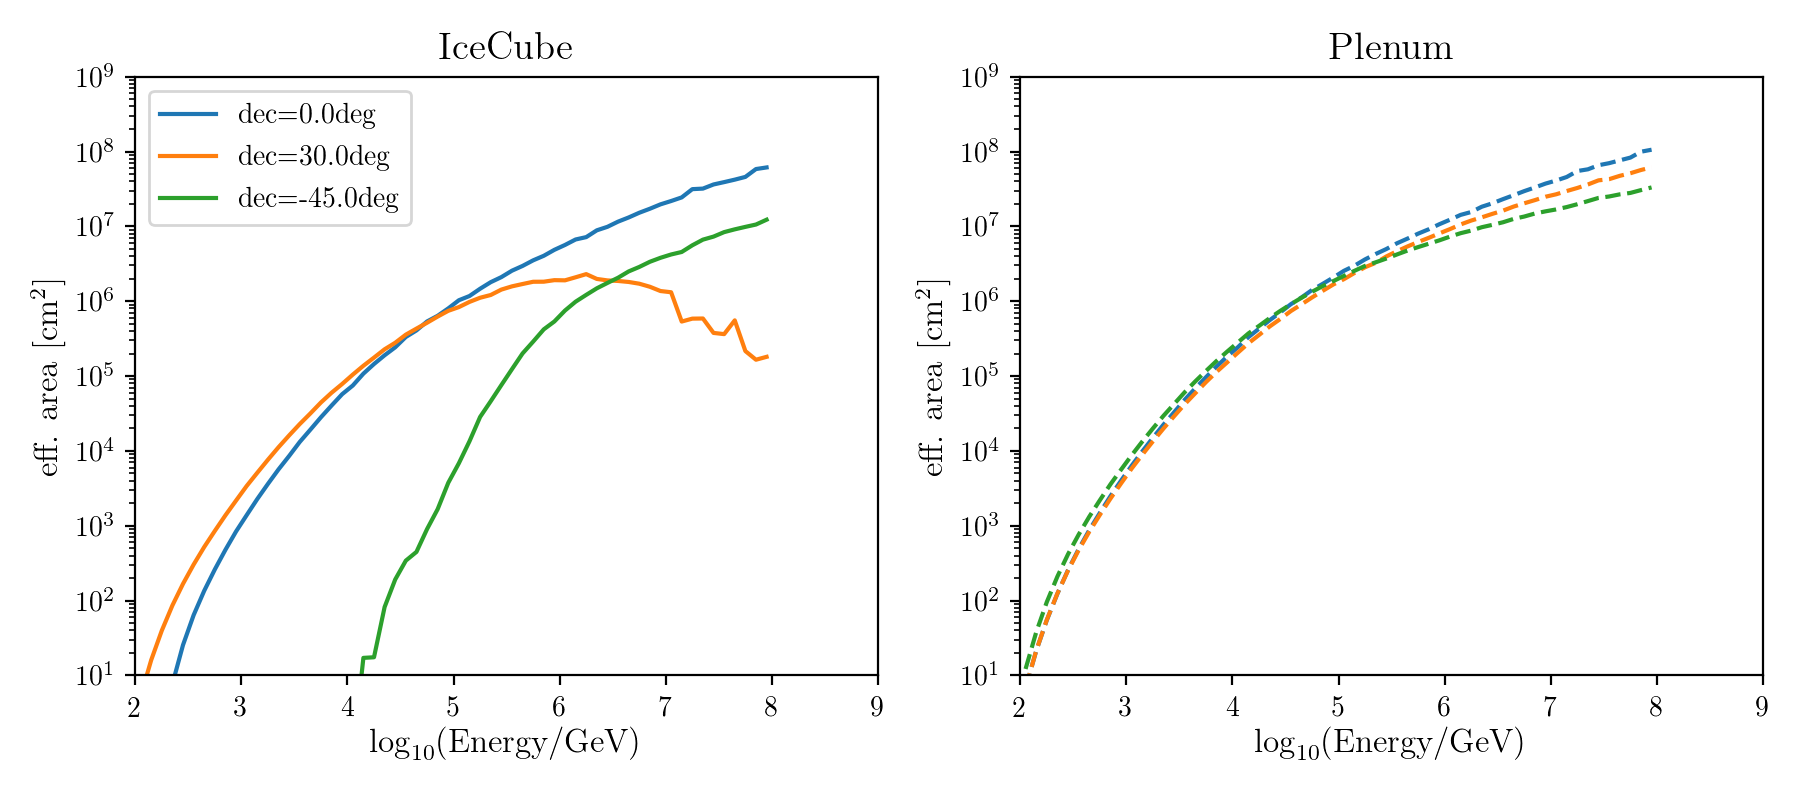

In [30]:
fig, axes=plt.subplots(ncols=2, figsize=(9,4), sharey=False)

def search_ind(sinDec):
    ind = np.argmin(np.abs(sd_bins - sinDec))
    return ind

def search_eind(e_val):
    ind = np.argmin(np.abs(e_bins - e_val))
    return ind

decs = [0, np.sin(np.deg2rad(30)), np.sin(np.deg2rad(-45))]

res_icecube = results['effA_icecube'].reshape((n_sd, n_e))
res_plenum = results['effA_plenum'].reshape((n_sd, n_e))

axes[0].set_title('IceCube', fontsize=14)
axes[1].set_title('Plenum', fontsize=14)

for di in decs:
    indi = search_ind(di)
    
    p=axes[0].plot((e_bins[1:]+e_bins[:-1])/2., res_icecube[indi],
           label=r'dec={0:.1f}deg'.format(np.rad2deg(np.arcsin(di))))

    axes[1].plot((e_bins[1:]+e_bins[:-1])/2., res_plenum[indi],
           label=r'dec={0:.1f}deg'.format(np.rad2deg(np.arcsin(di))),
                ls='dashed', color=p[0].get_color())
    
for ax in axes:
    ax.set_xlim(2,9)
    ax.set_ylim(1e1,1e9)
    ax.set_yscale('log')
    ax.set_xlabel(r'$\log_{10}$(Energy/GeV)',fontsize=12)
    ax.set_ylabel(r'eff. area [cm$^2$]', fontsize=12)

axes[0].legend()
fig.tight_layout()


# Now compare these effective areas to the public icecube stuff to be sure nothing went wrong

In [31]:
# show the public detection efficiency 
d_public = np.genfromtxt('/Users/mhuber/Downloads/3year-data-release/IC86-2012-TabulatedAeff.txt',
                        skip_header=1)

emin, emax = d_public[:,0], d_public[:,1]
dec_min, dec_mac = -np.arcsin(d_public[:,2]), -np.arcsin(d_public[:,3])
aeff = d_public[:,4]



emids = (np.unique(emin)+np.unique(emax))/2.
ewidth = np.unique(emax)-np.unique(emin)


sd_mids = (-d_public[:,2]  - d_public[:,3]) / 2.
sd_mids_unique = np.unique(sd_mids)

def search_ind2(sinDec):
    ind2 = np.argmin(np.abs(sd_mids_unique - sinDec))
    return ind2


def search_eind2(e_val):
    ind2 = np.argmin(np.abs(emids - e_val))
    return ind2
        
    


In [32]:
idata = np.load('/Users/mhuber/Downloads/mc_pass2_IC79_IC86_baseline_V06.npy')

<IPython.core.display.Javascript object>


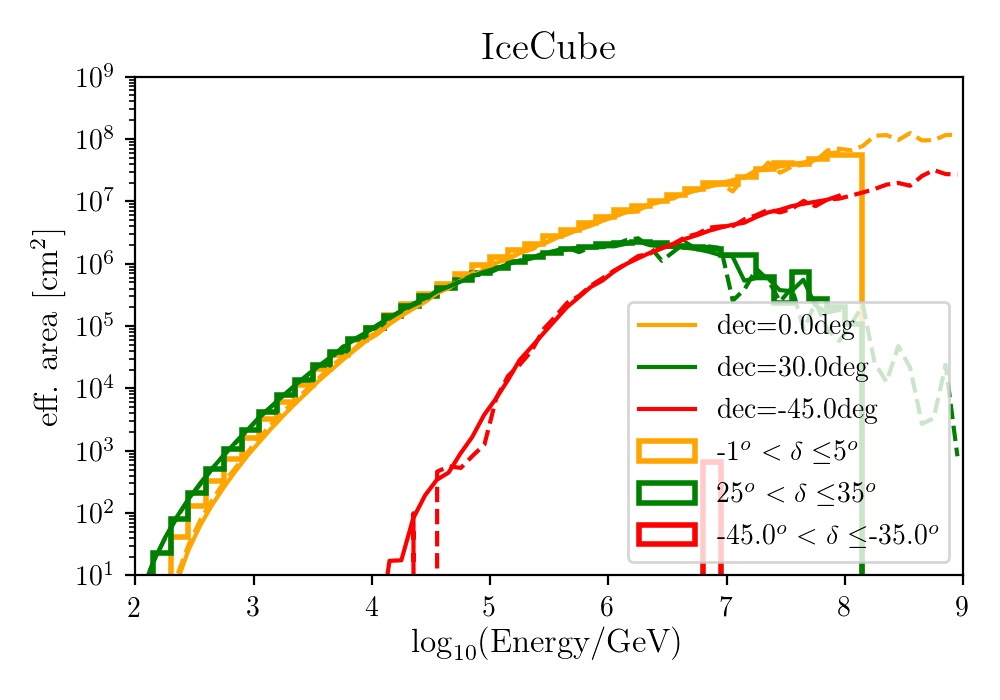

In [33]:
fig, ax = plt.subplots(ncols=1, figsize=(5,3.5))



decs = [0, np.sin(np.deg2rad(30)), np.sin(np.deg2rad(-45))]

res_icecube = results['effA_icecube'].reshape((n_sd, n_e))

ax.set_title('IceCube', fontsize=14)


cs = ['orange', 'green', 'red']
for i,di in enumerate(decs):
    indi = search_ind(di)
    
    p=ax.plot((e_bins[1:]+e_bins[:-1])/2., res_icecube[indi],
           label=r'dec={0:.1f}deg'.format(np.rad2deg(np.arcsin(di))),
             color=cs[i])

    ind2 = search_ind2(di)
    mask = sd_mids == sd_mids_unique[ind2]
    
    ax.plot(np.log10(((emin+emax)/2.)[mask]), 10**4*aeff[mask],
                ls='dashed', color=cs[i])
    

    
bins_E = np.arange(2,8.2,0.15)
#mids = 10**get_mids(bins_E)
bins_E = 10**bins_E
bin_width = np.diff(bins_E)
bin_width = np.append(bin_width, np.max(bin_width))

decs = [ (-1,5), (25,35), (-45.,-35.)]

for i,(dec_mini, dec_maxi) in enumerate(decs):
    
    dec_min, dec_max = np.sin(np.radians(dec_mini)), np.sin(np.radians(dec_maxi))
    Omega = 2 * np.pi * (dec_max - dec_min)
    dec_mask = (np.sin(idata['trueDec']) > dec_min)&(np.sin(idata['trueDec']) <= dec_max)

    ind = np.searchsorted(bins_E, idata['trueE'][dec_mask]) - 1
    
    Aeff = (idata['ow'])[dec_mask] / Omega / bin_width[ind]  

    
    ax.hist(np.log10(idata['trueE'][dec_mask]),bins=np.log10(bins_E), weights=Aeff,histtype='step', lw=2., color=cs[i],
            label=r'{0}$^o$ $< \delta \leq${1}$^o$'.format(dec_mini,dec_maxi))
    
ax.set_xlim(2,9)
ax.set_ylim(1e1,1e9)
ax.set_yscale('log')
ax.set_xlabel(r'$\log_{10}$(Energy/GeV)',fontsize=12)
ax.set_ylabel(r'eff. area [cm$^2$]', fontsize=12)

ax.legend()
fig.tight_layout()

# show effective areas vs declination

<IPython.core.display.Javascript object>


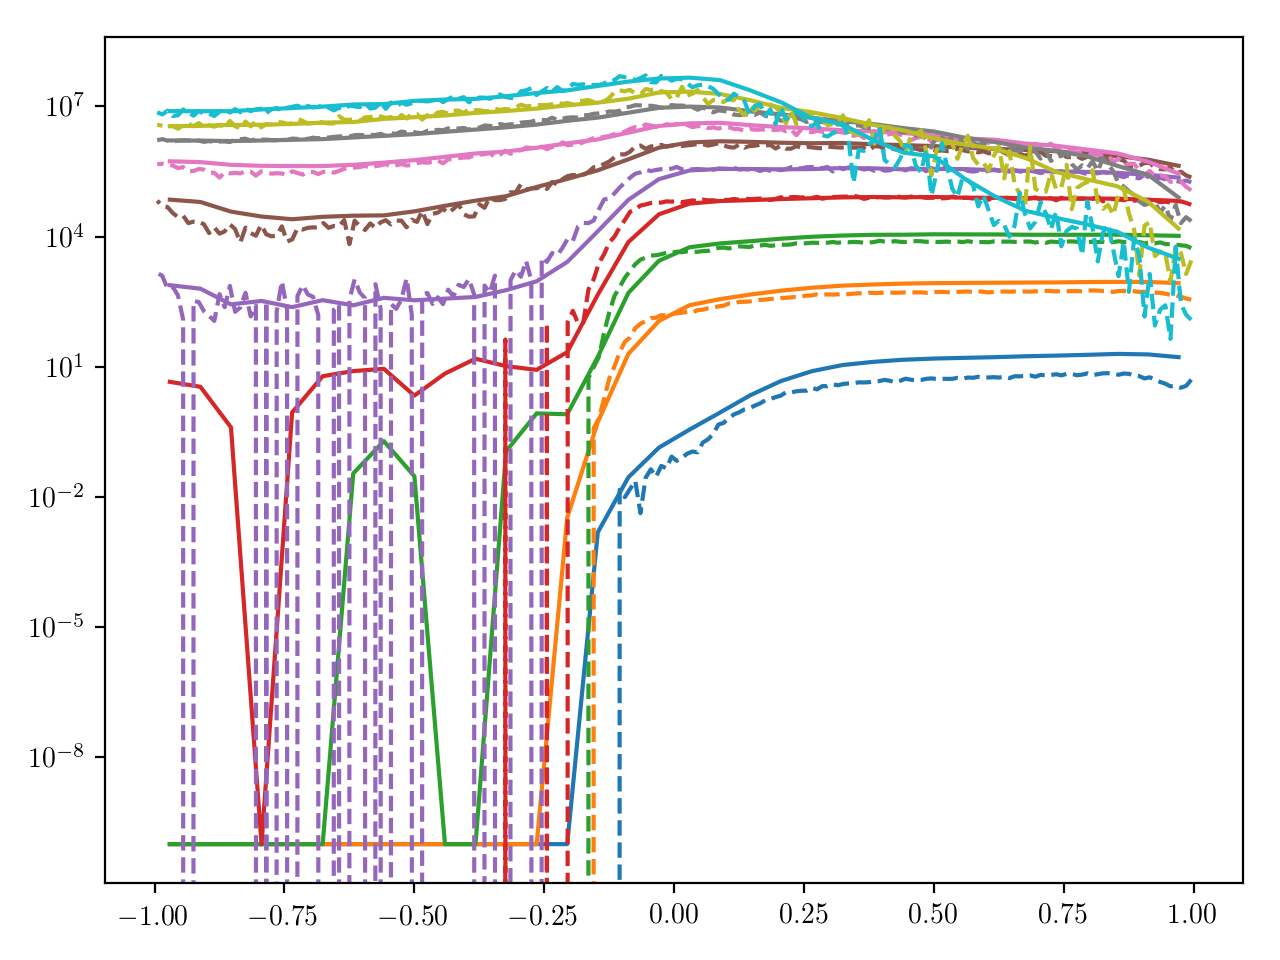

2.052886235256382
2.6751071644222817
3.297328093588181
3.919549022754081
4.541769951919981
5.16399088108588
5.78621181025178
6.40843273941768
7.030653668583579
7.652874597749478


In [38]:
fig, ax = plt.subplots()

evals = 10**np.linspace(np.log10(emids[0]), np.log10(emids[-14]), 10)
for i,ei in enumerate(evals):
    print(np.log10(ei))
    indi = search_eind(np.log10(ei))
    
    p=ax.plot((sd_bins[1:]+sd_bins[:-1])/2., res_icecube[:,indi],
             )

    ind2 = search_eind2(ei)
    mask = (emin+ emax)/2. == emids[ind2]
    
    ax.plot(sd_mids[mask], 10**4*aeff[mask],
                ls='dashed', color=p[0].get_color())

    ax.set_yscale('log')
fig.tight_layout()